# Data Processing in Python | SS 2025 
## Midterm exam, 31 Mar 2025
## Matěj Knop

In [30]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1

In [9]:
chd = pd.read_csv('/Users/matej/Documents/škola/uk/python2/midterm/data/CHD.csv')
de = pd.read_csv('/Users/matej/Documents/škola/uk/python2/midterm/data/DE.csv')
dhi = pd.read_csv('/Users/matej/Documents/škola/uk/python2/midterm/data/DHI.csv')
now = pd.read_csv('/Users/matej/Documents/škola/uk/python2/midterm/data/NOW.csv')
ups = pd.read_csv('/Users/matej/Documents/škola/uk/python2/midterm/data/UPS.csv')

company = [chd, de, dhi, now, ups]
company_name = ['chd', 'de', 'dhi', 'now', 'ups']

j = 0
for i in company:
    i['Date'] = pd.to_datetime(i['Date'])
    print(company_name[j])
    print(i.head())
    j += 1


chd
        Date    Open    High     Low   Close   Volume  Dividends  Stock Splits
0 2017-01-03  39.907  40.159  39.546  39.988  3126600        0.0           0.0
1 2017-01-04  40.150  40.556  40.051  40.313  1787300        0.0           0.0
2 2017-01-05  40.322  40.502  40.114  40.484  1358300        0.0           0.0
3 2017-01-06  40.466  40.556  40.087  40.466  1192000        0.0           0.0
4 2017-01-09  40.267  40.340  39.582  39.952  1441000        0.0           0.0
de
        Date    Open    High     Low   Close   Volume  Dividends  Stock Splits
0 2017-01-03  91.864  92.830  91.660  92.192  3379100        0.0           0.0
1 2017-01-04  92.449  94.363  92.236  93.760  4439000        0.0           0.0
2 2017-01-05  93.601  94.141  93.069  93.344  2328300        0.0           0.0
3 2017-01-06  93.743  94.584  93.397  94.354  2633300        0.0           0.0
4 2017-01-09  93.867  94.194  92.901  93.202  2195000        0.0           0.0
dhi
        Date    Open    High     Low   Cl

In [13]:
# Is there a company that has no difference between the High and Low columns? What does it mean for the stock's trading behavior on such days?

j = 0
for i in company:
    a = i[i['High'] == i['Low']].shape[0]
    b = i.shape[0]
    print(company_name[j])
    print((a,b))
    print(f"The numer of rows for '{company_name[j]}' where 'High' == 'Low' is: {a}.")
    j += 1

## This means that the stock price changes for all companies throughout the days. The only exception is 'chd' where there was one day without a change in the stock price.

chd
(1, 1510)
The numer of rows for 'chd' where 'High' == 'Low' is: 1.
de
(0, 1510)
The numer of rows for 'de' where 'High' == 'Low' is: 0.
dhi
(0, 1510)
The numer of rows for 'dhi' where 'High' == 'Low' is: 0.
now
(0, 1510)
The numer of rows for 'now' where 'High' == 'Low' is: 0.
ups
(0, 1510)
The numer of rows for 'ups' where 'High' == 'Low' is: 0.


In [14]:
# What is the highest and lowest price (High) each company recorded?

j = 0
for i in company:
    print(company_name[j])
    print(f"The highest price (High) was {i['High'].max()}")
    print(f"The lowest price (High) was {i['High'].min()}")
    j += 1

chd
The highest price (High) was 101.94
The lowest price (High) was 39.411
de
The highest price (High) was 436.316
The lowest price (High) was 92.83
dhi
The highest price (High) was 107.273
The lowest price (High) was 25.459
now
The highest price (High) was 707.6
The lowest price (High) was 76.99
ups
The highest price (High) was 207.569
The lowest price (High) was 75.883


**!!! if time, put into array**

In [ ]:
# Calculate logarithmic returns from Close. For each company report on its: min, max, mean, standard deviation, and skewness of the return distribution.

j = 0
for i in company:
    print(company_name[j])
    i['Log Returns'] = np.log(i['Close'] / i['Close'].shift(1))
    print(f"Minimum log returns: {i['Log Returns'].min()}")
    print(f"Maximum log returns: {i['Log Returns'].max()}")
    print(f"Mean log returns: {i['Log Returns'].mean()}")
    print(f"Standard deviation of log returns: {i['Log Returns'].std()}")
    print(f"Skewness of log returns distribution: {i['Log Returns'].skew()}")
    j += 1

chd
Minimum log returns: -0.08953621867690809
Maximum log returns: 0.12811733664423194
Mean log returns: 0.0004493317872641387
Standard deviation of log returns: 0.014498805579142463
Skewness of log returns: -0.23375173913398392
de
Minimum log returns: -0.15166188237727501
Maximum log returns: 0.12540085511393298
Mean log returns: 0.0010023178462578684
Standard deviation of log returns: 0.020258373704062752
Skewness of log returns: -0.5888541155605098
dhi
Minimum log returns: -0.2260147181114959
Maximum log returns: 0.1367344168663209
Mean log returns: 0.000824653410315118
Standard deviation of log returns: 0.023923346099366163
Skewness of log returns: -0.6155546349572877
now
Minimum log returns: -0.13623838578319677
Maximum log returns: 0.1261387512220047
Mean log returns: 0.0010837981144449394
Standard deviation of log returns: 0.025925867726486765
Skewness of log returns: -0.03578567288556144
ups
Minimum log returns: -0.09227674376317713
Maximum log returns: 0.13431969566077873
Mean

**!!! tthis is wrong**

In [22]:
# When did each company record the second highest gain and second highest loss for the day?

j = 0
for i in company:
    print(company_name[j])
    max_gain = i['Log Returns'].idxmax()
    max_loss = i['Log Returns'].idxmin()
    print(f"Max gain date: {i['Date'][max_gain]}")
    print(f"Max loss date: {i['Date'][max_loss]}")
    print(f"Max gain: {i['Log Returns'][max_gain]}")
    print(f"Max loss: {i['Log Returns'][max_loss]}")
    j =+ 1

chd
Max gain date: 2020-03-17 00:00:00
Max loss date: 2022-07-29 00:00:00
Max gain: 0.12811733664423194
Max loss: -0.08953621867690809
de
Max gain date: 2020-03-24 00:00:00
Max loss date: 2022-05-20 00:00:00
Max gain: 0.12540085511393298
Max loss: -0.15166188237727501
de
Max gain date: 2020-04-06 00:00:00
Max loss date: 2020-03-16 00:00:00
Max gain: 0.1367344168663209
Max loss: -0.2260147181114959
de
Max gain date: 2022-10-27 00:00:00
Max loss date: 2022-07-12 00:00:00
Max gain: 0.1261387512220047
Max loss: -0.13623838578319677
de
Max gain date: 2020-07-30 00:00:00
Max loss date: 2020-10-28 00:00:00
Max gain: 0.13431969566077873
Max loss: -0.09227674376317713


In [25]:
# What is the median calendar weekly volume for each company? Hint: check how to resample pandas DF

j = 0
for i in company:
    print(company_name[j])
    resampled = i.resample('W', on='Date').agg({'Volume': 'median'})
    print(resampled)
    print(f"Median of medians: {resampled['Volume'].median()}")
    j += 1

chd
               Volume
Date                 
2017-01-08  1572800.0
2017-01-15  1854900.0
2017-01-22  2408500.0
2017-01-29  2725600.0
2017-02-05  1872800.0
...               ...
2022-12-04  1584100.0
2022-12-11  1396000.0
2022-12-18  1884500.0
2022-12-25   994900.0
2023-01-01   748100.0

[313 rows x 1 columns]
Median of medians: 1439200.0
de
               Volume
Date                 
2017-01-08  3006200.0
2017-01-15  1745100.0
2017-01-22  2190000.0
2017-01-29  2073100.0
2017-02-05  1645800.0
...               ...
2022-12-04  1747400.0
2022-12-11  1340400.0
2022-12-18  1675500.0
2022-12-25  1220500.0
2023-01-01   790950.0

[313 rows x 1 columns]
Median of medians: 1753200.0
dhi
               Volume
Date                 
2017-01-08  4577400.0
2017-01-15  4171300.0
2017-01-22  3910850.0
2017-01-29  7794500.0
2017-02-05  5309800.0
...               ...
2022-12-04  2491400.0
2022-12-11  2172300.0
2022-12-18  3647400.0
2022-12-25  3139500.0
2023-01-01  1512200.0

[313 rows x 1 columns]
M

In [28]:
# Which company recorded the lowest total return over the whole period?

j = 0
total_return = []
for i in company:
    print(company_name[j])
    total_return.append(i['Close'].iloc[-1] / i['Close'].iloc[0] - 1)
    print(total_return[j])
    j += 1
min_return = min(total_return)
min_index = total_return.index(min_return)
print(f"The company with the lowest total return is '{company_name[min_index]}' with a total return of: {min_return:.2%}.")


chd
0.9700160048014406
de
3.5380510239500182
dhi
2.470858591861801
now
4.13177372455723
ups
0.8149109032566393
The company with the lowest total return is 'ups' with a total return of: 81.49%.


In [ ]:
# Create a new column volume_class based on the volume column into categories (e.g., "Low", "Medium", "High") and use tertile thresholds for the classes.

j = 0
for i in company:
    print(company_name[j])
    lower_q = i['Volume'].quantile((0.333)).item()
    higher_q = i['Volume'].quantile(0.666).item()
    if i['Volume'] > lower_q & i['Volume'] > higher_q:
        i['Volume_class'] = "High"
    elif i['Volume'] <= lower_q & i['Volume'] <= higher_q:
        i['Volume_class'] = "Low"
    else:
        i['Volume_class'] = "Medium"
    print((lower_q, higher_q))
    print(i.head())
    j += 1


chd


TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]

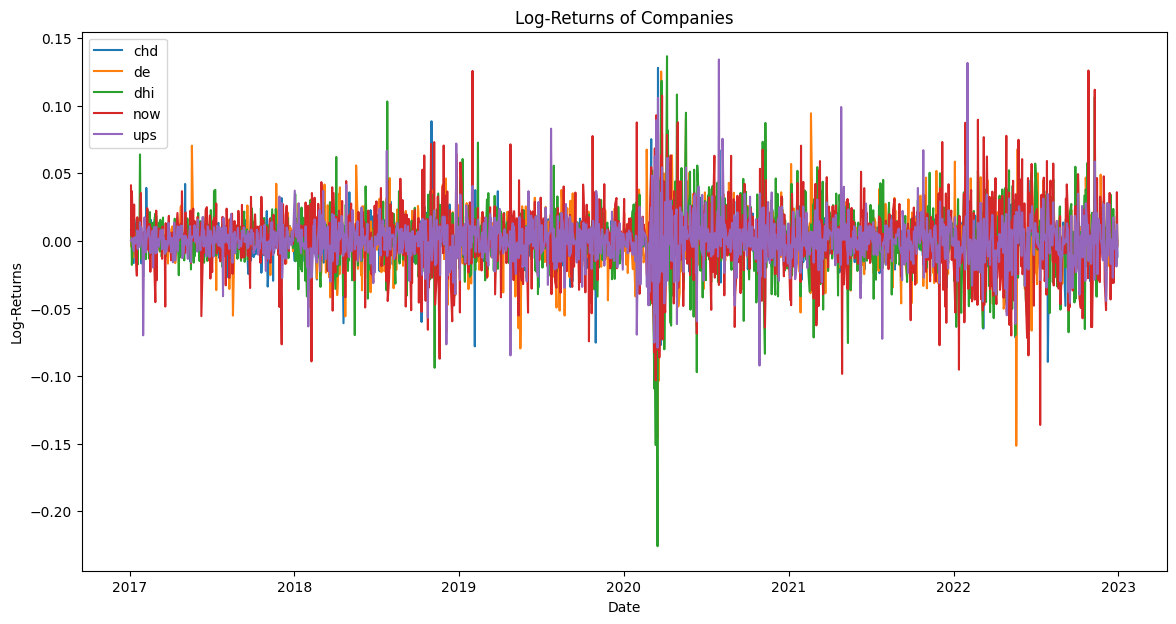

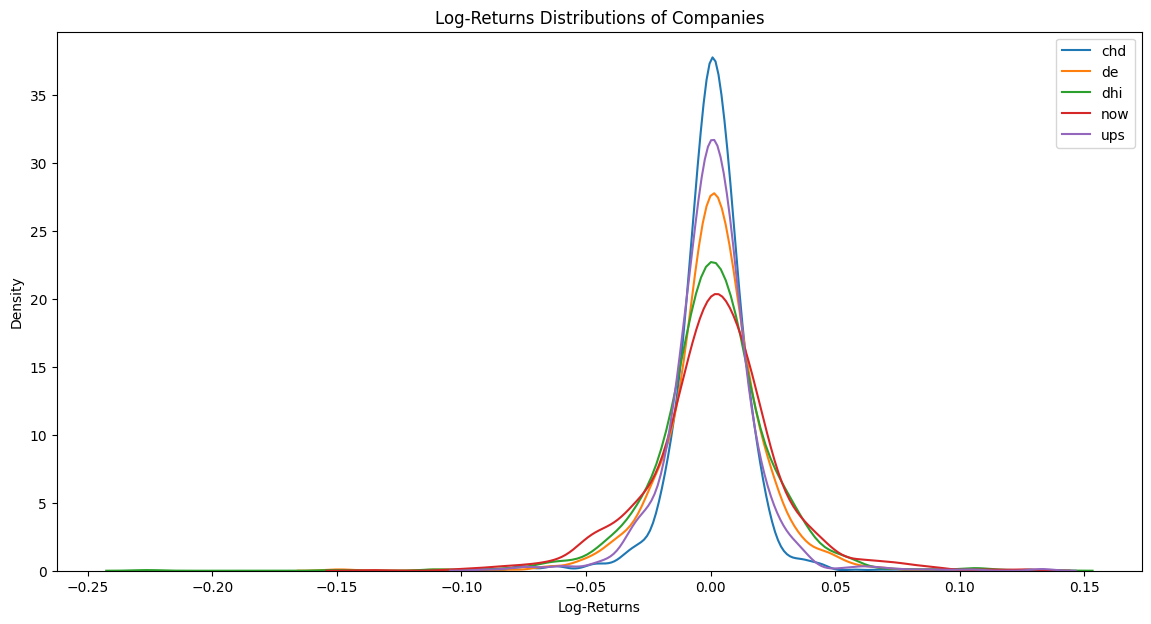

In [33]:
# Plot the log-returns of the companies (ideally in the same plot).

j = 0
plt.figure(figsize=(14, 7))
plt.title('Log-Returns of Companies')
for i in company:
    plt.plot(i['Date'], i['Log Returns'], label=company_name[j])
    j += 1
plt.xlabel('Date')
plt.ylabel('Log-Returns')
plt.legend()
plt.show()

# Show the log-return distribution of the companies (ideally in the same plot).

j = 0
plt.figure(figsize=(14, 7))
plt.title('Log-Returns Distributions of Companies')
for i in company:
    sns.kdeplot(i['Log Returns'], label=company_name[j])
    j += 1
plt.xlabel('Log-Returns')
plt.ylabel('Density')
plt.legend()
plt.show()


### Part 2

In [51]:
data = pd.read_csv("https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")
print(data.head())
print(data.shape[0])

  Symbol     Security  GICS_Sector                       hq    included  \
0    MMM           3M  Industrials    Saint Paul, Minnesota  09.08.1976   
1    AOS  A. O. Smith  Industrials     Milwaukee, Wisconsin  26.07.2017   
2    ABT       Abbott  Health Care  North Chicago, Illinois  31.03.1964   
3   ABBV       AbbVie  Health Care  North Chicago, Illinois  31.12.2012   
4   ABMD      Abiomed  Health Care   Danvers, Massachusetts  31.05.2018   

       Founded  
0         1902  
1         1916  
2         1888  
3  2013 (1888)  
4         1981  
503


In [46]:
# Find out how many companies do not filled-in the date of inclusion

print(data['included'].isna().sum())

45


In [52]:
# Delete the companies with no inclusion date and calculate which company is
# the oldest/youngest constituent and tell us the median age of a constituent in
# the sample. If you need to fix anything or make any assumptions, comment on
# them in the code.

data_del = data[data['included'].notna()]
print(data_del.shape[0] == data['included'].isna().sum() + data.shape[0])

data_del = data_del.to_datetime('included', dayfirst=True, errors='coerce')


False


AttributeError: 'DataFrame' object has no attribute 'to_datetime'

GICS_Sector
Information Technology    75
Industrials               71
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Real Estate               31
Utilities                 30
Materials                 28
Communication Services    25
Energy                    23
Name: count, dtype: int64


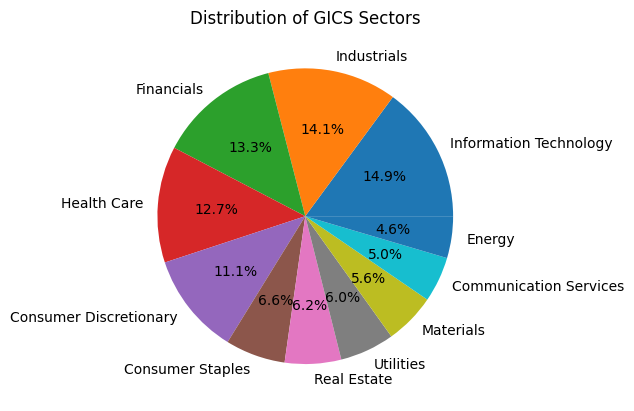

In [55]:
# Describe the distribution of companies across sectors and create a plot that demonstrates the proportionality of the sectors

sectors = data['GICS_Sector'].unique()
sector_counts = data['GICS_Sector'].value_counts()
print(sector_counts)

plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%')
plt.title("Distribution of GICS Sectors")
plt.show()

In [57]:
# Parse the “hq” column, extract the state of the hq and describe the distribution of the states

data['City', 'State'] = data['hq'].str.split(", ", expand=True)

for state in data['State']:
    print(state)

ValueError: Cannot set a DataFrame with multiple columns to the single column ('City', 'State')